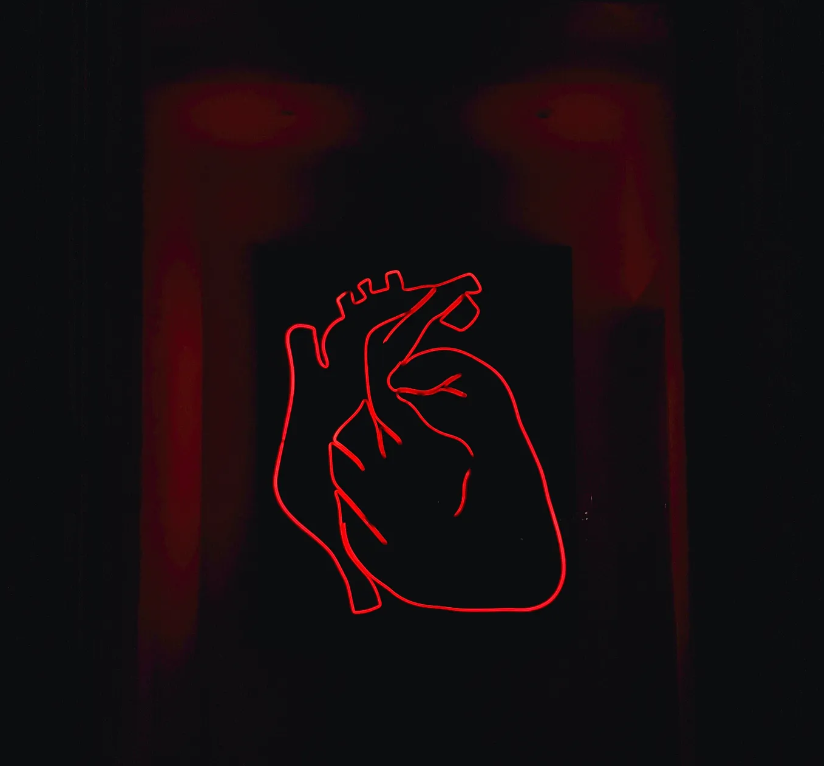

#**Framingham Heart Study**:  *Predicting the 10 year risk factors*


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
framingham=pd.read_csv("framingham.csv")

In [ ]:
framingham.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [ ]:
framingham.shape

(4240, 16)

# Exploratory Data Visualization

Before creating the model, I will perform some exploratory data visualization, to get some insights on the data.
As mentioned above, there are many risk factors such as smoking and high cholesterol levels that were found by the Framingham Heart Study to increase 10 year risk of CHD.
I will take a look at some of these risk factors, and see if I can find these relationships in this dataset.

First, I will create a count plot of the variable 'education,' in order to get a better understanding on the level of education of the participants.

<Axes: xlabel='education', ylabel='count'>

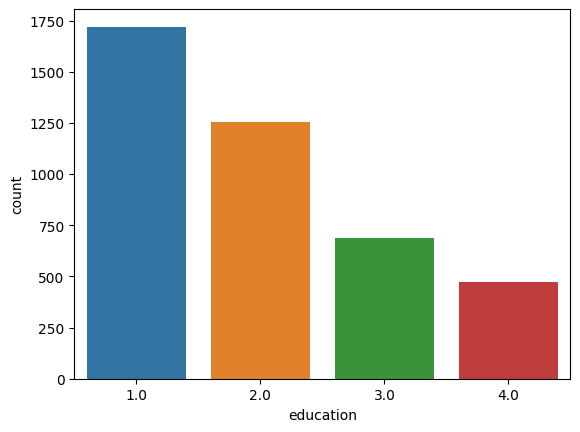

In [ ]:
sns.countplot(x='education',data=framingham)

Most participants seem to have some form of high school education. A fewer number of them have a diploma or went to college, and very few have a degree.

Now, I will look into some risk factors. In the year 1960, smoking was said to increase the risk of CHD. I will try to visualize this relationship.

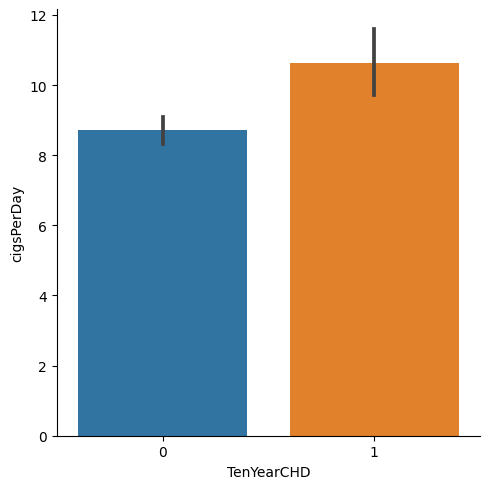

In [ ]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=framingham)

It can be seen that patients who have a ten year CHD risk smoke more cigarettes per day than those who do not.

Now, I will try to see if there is a relationship between age and the ten year risk of CHD. I will sort this by the category smoker.

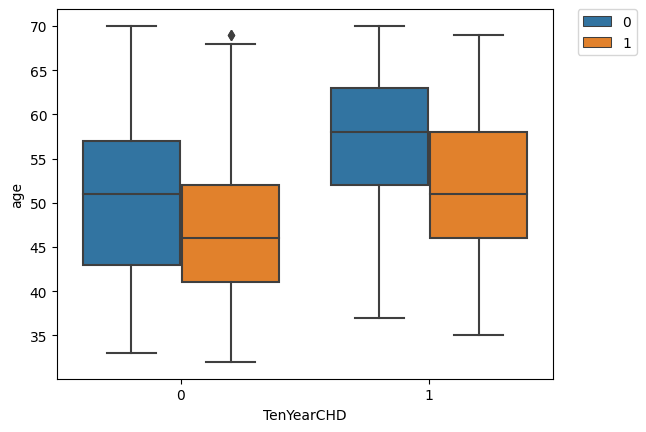

In [ ]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From here, it can be seen that older patients are more likely to develop CHD. Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

Next, I will take a look at the relationship between age, prevalent stroke, and the ten year risk of developing CHD.

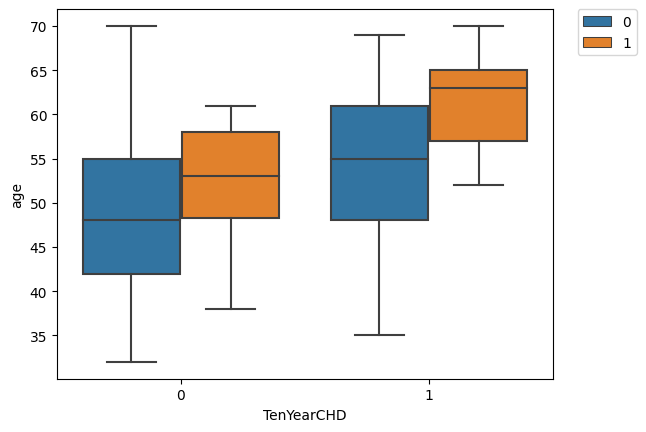

In [ ]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks as though strokes are more prevalent in participants of an older age group.

Now, I will take a look at the variables age, diabetes, and ten year risk of developing CHD.

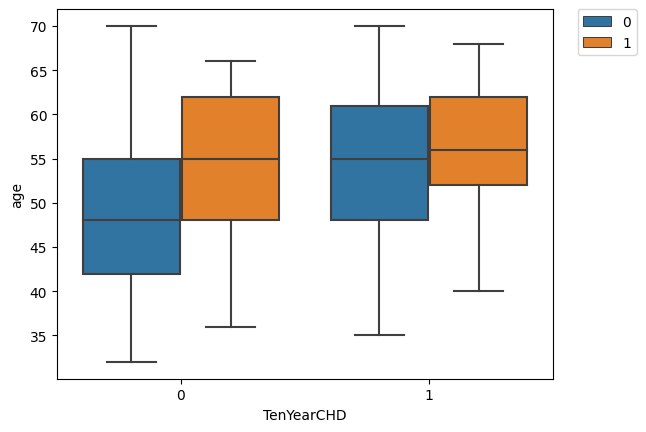

In [ ]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Again, it looks as though an older participant is more likely to have diabetes than a younger one.


Now, I will take a look at total cholesterol levels. In the year 1961, an increase in cholesterol levels was found to increase the risk of CHD.

(80.0, 725.45)

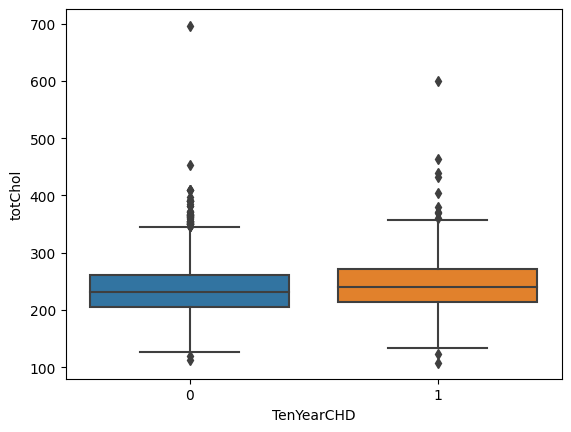

In [ ]:
sns.boxplot(x='TenYearCHD',y='totChol',data=framingham)
plt.ylim(80)

Patients with a ten year CHD risk have slightly higher cholesterol levels than patients who don't, though the difference is very small and not significant. This may be attributed to the fact that the variable 'total cholesterol' includes both LDL and HDL.
LDL, or 'bad cholesterol' is said to increase the risk of CHD. HDL, or 'good cholesterol' is said to decrease the risk of CHD.
The variable total cholesterol includes both of them, which is probably why its hard to see a proper relationship in the plot above.
If the data set had the two kinds of cholesterol as separate variables, the outcome may have been clearer.

Next, I will take a look at both systolic and diastolic blood pressure, and visualize their relationship with ten year CHD risk.

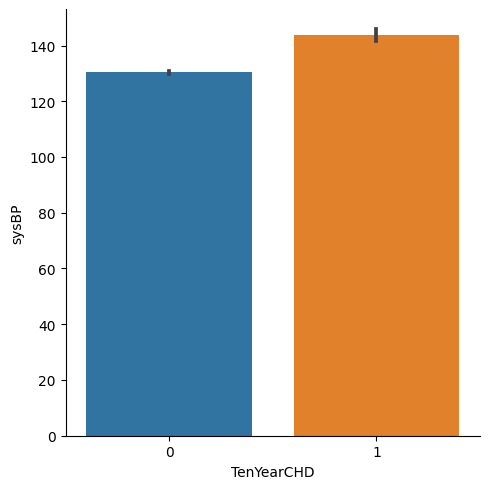

In [ ]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=framingham)

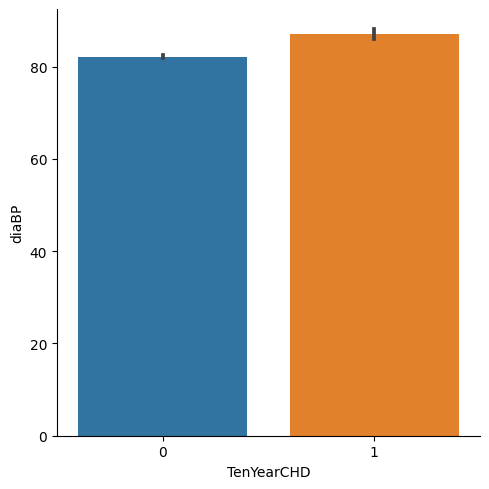

In [16]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=framingham)

Blood pressure does seem to be linked with coronary heart disease. Patients with a ten year CHD risk seem to have higher blood pressure than the ones who don't.

In the year 2002, obesity was found to be a risk factor in developing CHD. I will now take a look at the relationship between BMI and the ten year risk of CHD.

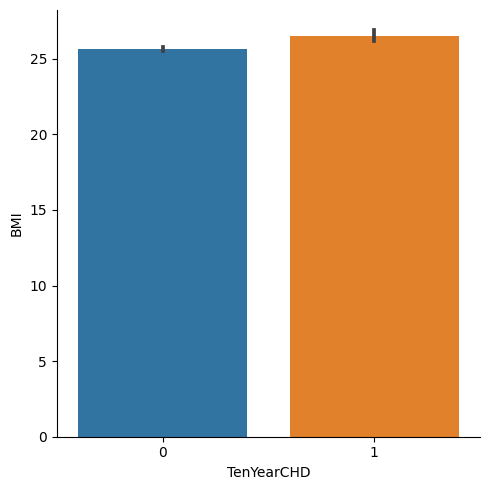

In [17]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=framingham)

Patients with CHD are seen to have slightly higher BMI than patients without.

In the year 1961, high BP was said to increase the risk of CHD. Finally, I will be taking a look at BP medications, and see if there is a relationship.

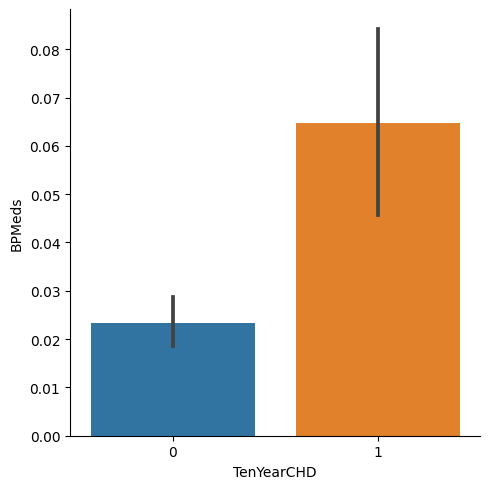

In [19]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=framingham)

A higher dosage of BP medications is associated with a larger ten year CHD risk.

# Data Preprocessing

Now that I have explored the data set, I will do some preprocessing before creating the model.

In [21]:
#check for null values
framingham.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [23]:
#dropping null values
framingham=framingham.dropna()

In [24]:
framingham.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

The model to classify the ten year risk of CHD needs to perform better than the baseline. A baseline model is a model that classifies everything into the majority class.

In [26]:
framingham['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

Here, the majority class is 0, or absence of ten year CHD. The baseline accuracy is computed:

In [27]:
# Baseline accuracy:
3101/(3101+557)

0.8477310005467469

The model needs to beat the baseline accuracy of 0.85.

#Train-test split

In [28]:
from sklearn.model_selection import train_test_split

In [31]:
X=framingham.drop('TenYearCHD',axis=1)
y=framingham['TenYearCHD']

In [32]:
X_train,X_text,y_train,y_test=train_test_split(X,y,test_size=0.35)

In [33]:
# imports
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

##Over and under-sampling

The data set it unbalanced, and more than 80% of the data is of participants who don't have a ten year CHD risk. To overcome this, I did both; oversampling and undersampling.
Then, I created a pipeline for a decision tree classifier.

In [34]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)

In [35]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

## Fitting the data to the pipeline

In [36]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

##Making predictions on test data

In [37]:
pipepred=pipeline.predict(X_test)

##Evaluating the model

In [38]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1080
           1       0.84      0.97      0.90      1091

    accuracy                           0.89      2171
   macro avg       0.90      0.89      0.89      2171
weighted avg       0.90      0.89      0.89      2171



In [39]:
accuracy_score(y_test,pipepred)

0.8917549516351911

This model has high precision and recall for both outcomes, and has an accuracy of 0.89, which beats the baseline.